In [19]:
import pandas as pd

# Assignment 1: pd.Concat

Combine the 2014 and 2015 data you wrote out in the last section into a single dataframe. 

Then delete the transactions DataFrame (there is a handy base Python keyword for this).

In [58]:
# Code to read in transactions data if you need to re-create CSV/Excel files from section 8 
# NOTE: You won't have the extra columns we created but it won't matter for this assignment

transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])

# Excel

with pd.ExcelWriter("DataForChandler.xlsx") as writer:
    for year in range(2013, 2018):
        transactions.loc[transactions["date"].dt.year == year].to_excel(
            writer, sheet_name=str(year)
        )
        
# CSV  

# for year in range(2013, 2018):
#     transactions.loc[transactions["date"].dt.year == year].to_csv(
#         f"transactions_{year}.csv"
#     )

In [63]:
#CSV
# transactions = pd.concat(
#     (pd.read_csv("transactions_2014.csv"),
#      pd.read_csv("transactions_2015.csv")),
# ).drop(["Unnamed: 0"], axis=1)

# transactions.head()

In [64]:
# Excel
transactions = pd.concat(
    pd.read_excel("DataForChandler.xlsx", sheet_name=[1, 2]),
    ignore_index=True
).drop(["Unnamed: 0"], axis=1)

In [65]:
transactions.head()

,date,store_nbr,transactions
0,2014-01-01,25,840
1,2014-01-01,36,487
2,2014-01-02,1,1875
3,2014-01-02,2,2122
4,2014-01-02,3,3350


In [66]:
transactions.tail()

,date,store_nbr,transactions
35479,2015-12-31,49,3828
35480,2015-12-31,50,2948
35481,2015-12-31,51,2892
35482,2015-12-31,53,2300
35483,2015-12-31,54,1572


# Assignment 2: Joins

Can you join retail.csv with stores.csv? You'll need to read both files in.

Once you have that, plot:
* Total sales by city, 
* The sum of sales by “type” over time,
* A stacked bar chart with average daily sales by type by month, with “type” as the “stacks”. 


In [26]:
retail = pd.read_csv("../retail/retail.csv", parse_dates=["date"])
stores = pd.read_csv("../retail/stores.csv")

In [27]:
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [28]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [32]:
retail_stores = retail.merge(stores,
                             how='left',
                             left_on="store_nbr",
                             right_on="store_nbr")

In [33]:
retail_stores.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1945945,2016-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,1945946,2016-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,1945948,2016-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


In [35]:
retail_stores.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054944 entries, 0 to 1054943
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
 6   city         1054944 non-null  object        
 7   state        1054944 non-null  object        
 8   type         1054944 non-null  object        
 9   cluster      1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 313.4 MB


<Axes: xlabel='city'>

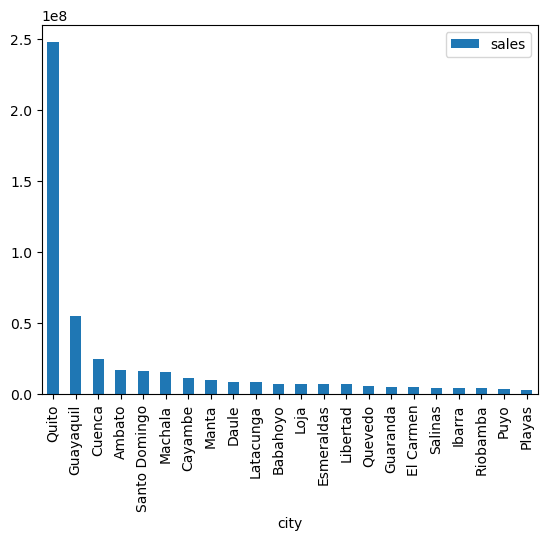

In [36]:
(retail_stores
 .groupby(["city"])
 .agg({"sales":"sum"})
 .sort_values(by="sales", ascending=False
).plot.bar())

<Axes: xlabel='date'>

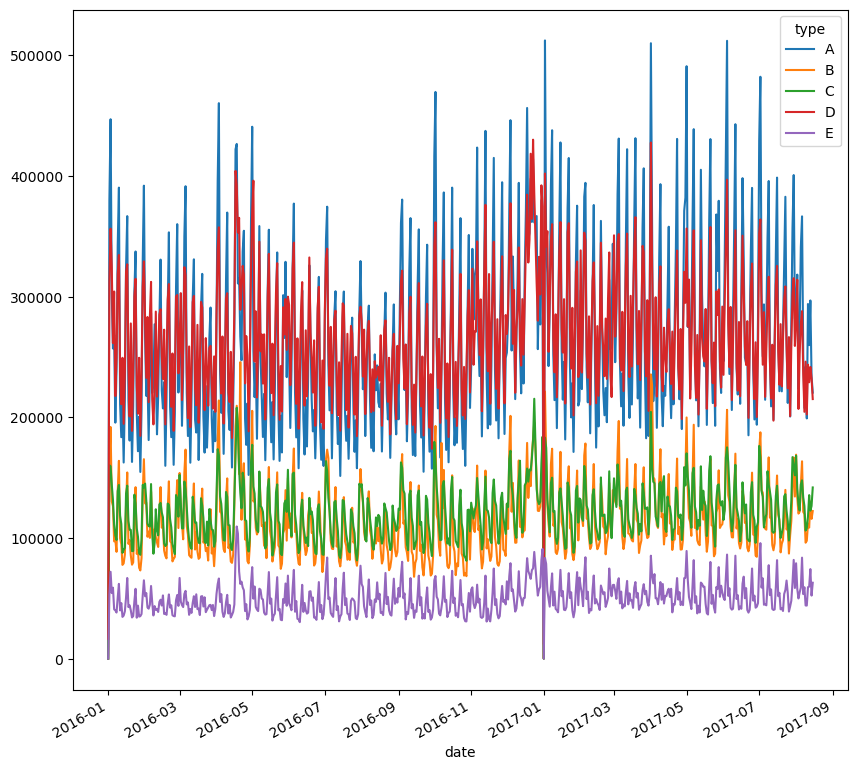

In [39]:
retail_stores.pivot_table(
    index=["date"],
    columns="type",
    values="sales",
    aggfunc="sum"
).plot(figsize=(10, 10))

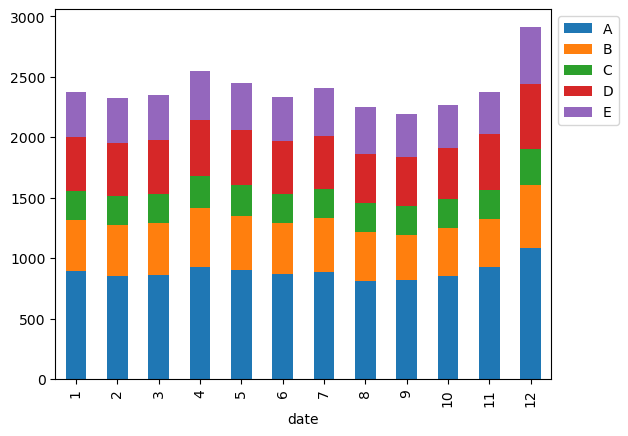

In [55]:
retail_stores.pivot_table(
    index="type",
    columns=retail_stores["date"].dt.month,
    values="sales",
    aggfunc="mean"
).T.plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1))

In [56]:
del [retail, stores]

In [57]:
retail.head()

NameError: name 'retail' is not defined